In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = '/Users/kavyasuresh/DS/Social-Stocking/Data set/pepsi/'
stock = pd.read_csv(path+"pepsi_stock.csv") 

inp = pd.read_csv("test.csv")
close = []    
all_dates = []
for i,row in inp.iterrows():
    c = 0
    dates = row[0].split(" ")[0].split("-")
    if int(dates[2]) < 10:
        dates[2]  = dates[2].strip("0")
    date = dates[1]+"/"+dates[2]+"/"+dates[0][2:]
    all_dates.append(date)
    f = df.loc[df['timestamp'] == date]
    close.append(f['close'].values[0])
inp['close'] = close
inp['date'] = all_dates
for i,row in inp.iterrows():
    print(row)
    c = c+1
    if c == 2:
        break

In [50]:
topic_df = pd.read_csv(path+"Topic.csv", index_col=0)
emo_df = pd.read_csv(path+"pepsi_emo.csv", index_col=0)
emo_df = emo_df[1:]
df = pd.concat([topic_df.reset_index(drop=True),emo_df.reset_index(drop=True)], axis=1)
#### For visualization ####
# df.to_csv(path+"pepsi_all.csv")
df.head(10)

,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,...,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Angry,Happy,Satisfaction,Stress
0,1.062840e+18,1.542240e+12,11/14/18,14:43:00,PST,272615522.0,joshua_schall,"Joshua Schall, MBA",NaN,Congrats to all the brands in the first @Pepsi...,...,0.035303,0.579356,0.042192,0.124514,0.161551,0.043706,0.072200,0.999999,0.889401,0.000010
1,1.062840e+18,1.542230e+12,11/14/18,14:32:14,PST,249669981.0,wusupmyguy,Mark A Bautista,NaN,"@Fritolay @PepsiCo Please, for the love of God...",...,0.010615,0.894092,0.006780,0.038153,0.037325,0.010535,0.007191,0.999999,0.998035,0.000010
2,1.062830e+18,1.542230e+12,11/14/18,14:08:10,PST,39845571.0,cspmagazine,CSP Magazine,NaN,.@PepsiCo selects brands for Nutrition Greenho...,...,0.035303,0.579356,0.042192,0.124514,0.161551,0.043706,0.072200,0.999999,0.889401,0.000010
3,1.062480e+18,1.542230e+12,11/14/18,14:03:59,PST,21346619.0,pepsico,PepsiCo,NaN,We are committed to addressing the issues & ha...,...,0.031978,0.284973,0.032426,0.139227,0.469324,0.016253,0.245291,0.999999,0.873567,0.000010
4,1.062500e+18,1.542230e+12,11/14/18,14:03:58,PST,21346619.0,pepsico,PepsiCo,NaN,Our JV partners are held to the same requireme...,...,0.170497,0.334609,0.072173,0.192451,0.146047,0.052984,0.000010,0.999999,0.777374,0.322033
5,1.062560e+18,1.542230e+12,11/14/18,14:03:56,PST,21346619.0,pepsico,PepsiCo,NaN,We have been transparent about our journey on ...,...,0.178084,0.065815,0.049250,0.288526,0.329702,0.052123,0.000010,0.999999,0.357389,0.368054
6,1.062630e+18,1.542230e+12,11/14/18,14:03:55,PST,21346619.0,pepsico,PepsiCo,NaN,We are committed to addressing the issues & ha...,...,0.170019,0.231581,0.056974,0.277651,0.215636,0.022194,0.000010,0.999999,0.668752,0.430131
7,1.062680e+18,1.542230e+12,11/14/18,14:03:53,PST,21346619.0,pepsico,PepsiCo,NaN,We are focusing on progress & have been open a...,...,0.089007,0.299441,0.073379,0.136777,0.351033,0.028539,0.000010,0.999999,0.877523,0.199368
8,1.062690e+18,1.542230e+12,11/14/18,14:03:52,PST,21346619.0,pepsico,PepsiCo,NaN,We have been transparent about our journey on ...,...,0.035251,0.569487,0.060474,0.161819,0.134268,0.019632,0.099268,0.999999,0.937109,0.000010
9,1.062690e+18,1.542230e+12,11/14/18,14:03:48,PST,21346619.0,pepsico,PepsiCo,NaN,We are committed to addressing the issues & ha...,...,0.065845,0.314018,0.041504,0.138432,0.383930,0.027761,0.098820,0.999999,0.859792,0.000010


## To get one row per day

In [51]:
df = df.groupby(['date'], sort=False).mean()
df['date']=df.index
close = []
open_val = []    
stock['date'] = pd.to_datetime(stock['date'], errors='coerce')
for i,row in df.iterrows():
    c = 0
    f = stock.loc[str(row.date) == stock['date']]
    close.append(f['close'].values[0])
    open_val.append(f['open'].values[0])
df['close'] = close
df['open'] = open_val
df.head(10)
##Group by output
df.to_csv(path+"pepsi_FINAL.csv")

### For visualisation

date
11/14/18    0.959864
11/13/18    0.983558
11/12/18    0.975338
11/11/18    0.987668
11/10/18    0.993834
11/9/18     0.999999
11/8/18     0.931334
11/7/18     0.909574
11/6/18     0.890232
11/5/18     0.850581
11/4/18     0.772729
11/3/18     0.733803
11/2/18     0.694877
11/1/18     0.711317
10/31/18    0.753387
10/30/18    0.820601
10/29/18    0.778048
10/28/18    0.719054
10/27/18    0.689558
10/26/18    0.660061
10/25/18    0.776114
10/24/18    0.781433
10/23/18    0.644587
10/22/18    0.609288
10/21/18    0.630806
10/20/18    0.641565
10/19/18    0.652324
10/18/18    0.538205
10/17/18    0.556580
10/16/18    0.512093
              ...   
6/13/18     0.409580
6/12/18     0.371379
6/11/18     0.309968
6/10/18     0.292560
6/9/18      0.283856
6/8/18      0.275152
6/7/18      0.210839
6/6/18      0.194882
6/5/18      0.164902
6/4/18      0.160550
6/3/18      0.163693
6/2/18      0.165264
6/1/18      0.166836
5/31/18     0.166836
5/30/18     0.243237
5/29/18     0.207938
5/28/18 

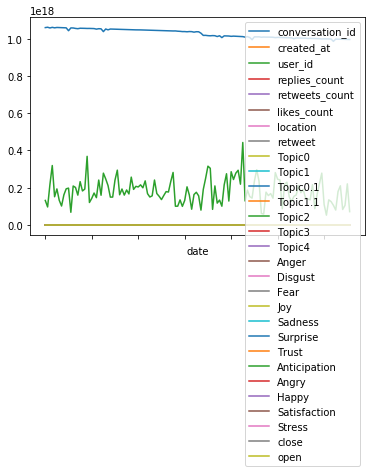

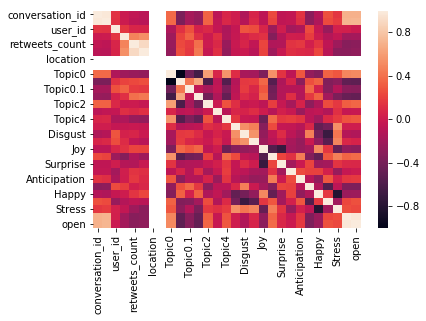

In [53]:
inpu = df['close']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['close'] = output


inpu = df['open']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['open'] = output


# df['close'].plot()
# df[['Topic0','Topic1','Topic2','Topic3','Topic4']].plot()
# plt.show()



# df.to_csv("msft_7rows.csv")
df.plot()
plt.show()
# df = df.drop('close', axis=1)
# df = df.drop('Topic0', axis=1)
# df = df.drop('Topic1', axis=1)
# df = df.drop('Topic2', axis=1)
# df = df.drop('Topic3', axis=1)
# df = df.drop('Topic4', axis=1)
# df.plot()
# # plt.gcf().set_size_inches(25, 35)
# plt.show()
cor = df.corr(method='spearman') #Calculate the correlation of the above variables
cor
sns.heatmap(cor, square = False) #Plot the correlation as heat map

Unnamed: 0                                                         0
id                                               1062857693390606336
conversation_id                                  1062857693390606336
created_at                                             1542239995000
date                                                      2018-11-14
time                                                        15:59:55
timezone                                                         PST
user_id                                           800170183855742976
username                                              dlyndhurst1964
name                                                 Daniel Carlucci
place                                                            NaN
tweet              @Microsoft your customer service is terrible. ...
mentions                                               ['microsoft']
urls                                                              []
photos                            